# IMPORTING LIBRARIES 

In [1]:
import numpy as np
import sklearn
print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

NumPy version: 2.2.4
scikit-learn version: 1.6.1


# DATA LOADING 

In [2]:
# Load data
df = pd.read_csv(r"C:\Users\HP\Documents\BSc in Data Science\Year 2\Semester 4\Data Mining & Machine Learning\ml_model_dataset.csv")

In [3]:
df.head()

,asin,reviewText,summary,price,brand,title,star_review,rating_class,i_words_count,positive_tone_count,negative_tone_count,social_words_count,cognitive_proc_count,allure_count,moralization_count
0,B000050FDY,great cleaning soultion,five stars,$11.94,Braun,Braun Clean &amp; Renew Refill Cartridges CCR ...,5,high,0,1,0,0,0,0,0
1,B000050FDY,great product and price,five stars,$11.94,Braun,Braun Clean &amp; Renew Refill Cartridges CCR ...,5,high,0,1,0,0,0,0,0
2,B000050FDY,great replacement kit,five stars,$11.94,Braun,Braun Clean &amp; Renew Refill Cartridges CCR ...,5,high,0,1,0,0,0,0,0
3,B000050FDY,expensive but it works just as advertised,four stars,$11.94,Braun,Braun Clean &amp; Renew Refill Cartridges CCR ...,4,high,0,0,0,0,0,0,0
4,B000050FDY,excellent value,five stars,$11.94,Braun,Braun Clean &amp; Renew Refill Cartridges CCR ...,5,high,0,1,0,0,0,0,0


In [4]:
# Check the shape of the dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (15657, 15)


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
asin                       0
reviewText                 0
summary                    0
price                   4050
brand                   2570
title                      0
star_review                0
rating_class               0
i_words_count              0
positive_tone_count        0
negative_tone_count        0
social_words_count         0
cognitive_proc_count       0
allure_count               0
moralization_count         0
dtype: int64


In [6]:
# Basic statistics for each feature
print("\nBasic statistics:")
df.describe()


Basic statistics:


,star_review,i_words_count,positive_tone_count,negative_tone_count,social_words_count,cognitive_proc_count,allure_count,moralization_count
count,15657.000000,15657.000000,15657.000000,15657.000000,15657.000000,15657.000000,15657.000000,15657.000000
mean,4.047710,0.420195,0.446829,0.019352,0.051095,0.018522,0.045219,0.016606
std,1.426073,0.727873,0.634451,0.144109,0.253378,0.141762,0.212653,0.129285
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,20.000000,8.000000,2.000000,7.000000,3.000000,3.000000,2.000000


In [7]:
# Check the data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
asin                    object
reviewText              object
summary                 object
price                   object
brand                   object
title                   object
star_review              int64
rating_class            object
i_words_count            int64
positive_tone_count      int64
negative_tone_count      int64
social_words_count       int64
cognitive_proc_count     int64
allure_count             int64
moralization_count       int64
dtype: object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15657 entries, 0 to 15656
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   asin                  15657 non-null  object
 1   reviewText            15657 non-null  object
 2   summary               15657 non-null  object
 3   price                 11607 non-null  object
 4   brand                 13087 non-null  object
 5   title                 15657 non-null  object
 6   star_review           15657 non-null  int64 
 7   rating_class          15657 non-null  object
 8   i_words_count         15657 non-null  int64 
 9   positive_tone_count   15657 non-null  int64 
 10  negative_tone_count   15657 non-null  int64 
 11  social_words_count    15657 non-null  int64 
 12  cognitive_proc_count  15657 non-null  int64 
 13  allure_count          15657 non-null  int64 
 14  moralization_count    15657 non-null  int64 
dtypes: int64(8), object(7)
memory usage:

# EDA

In [9]:
# Select and scale LIWC features
features = [
    'i_words_count', 'positive_tone_count', 'negative_tone_count',
    'social_words_count', 'cognitive_proc_count', 'allure_count', 'moralization_count'
]
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

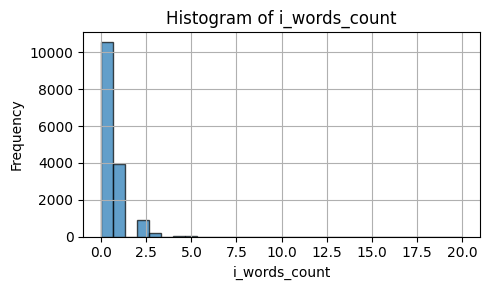

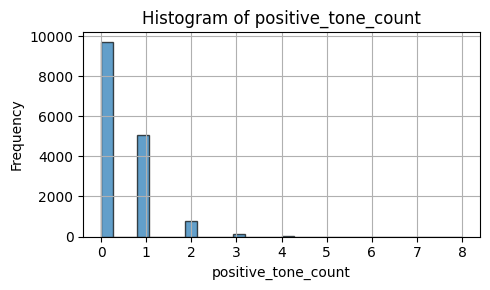

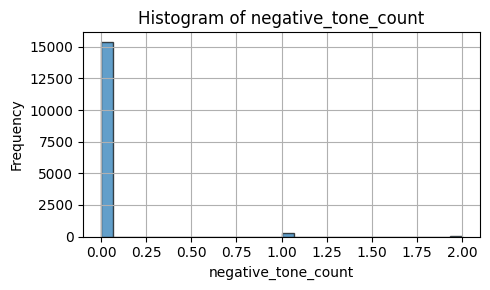

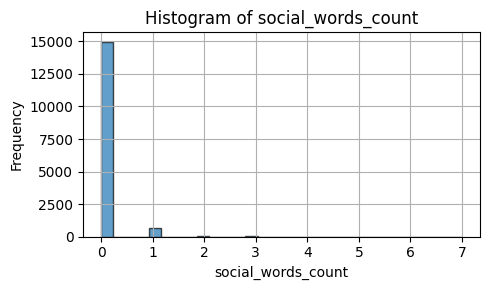

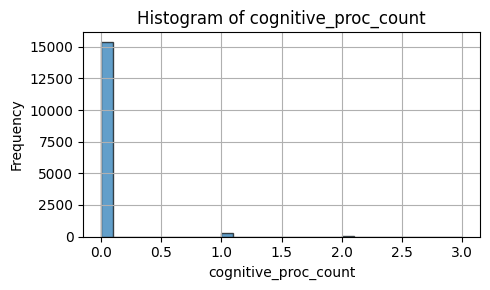

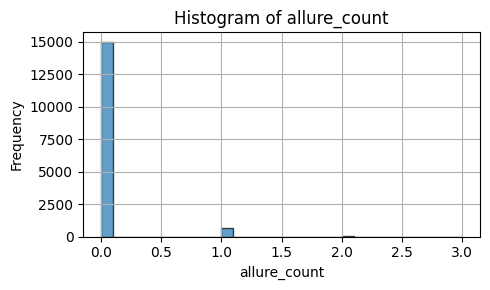

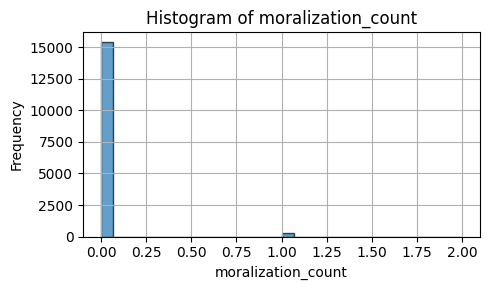

In [10]:
import matplotlib.pyplot as plt

liwc_features = [
    'i_words_count', 'positive_tone_count', 'negative_tone_count',
    'social_words_count', 'cognitive_proc_count', 'allure_count', 'moralization_count'
]

for col in liwc_features:
    plt.figure(figsize=(5, 3))
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


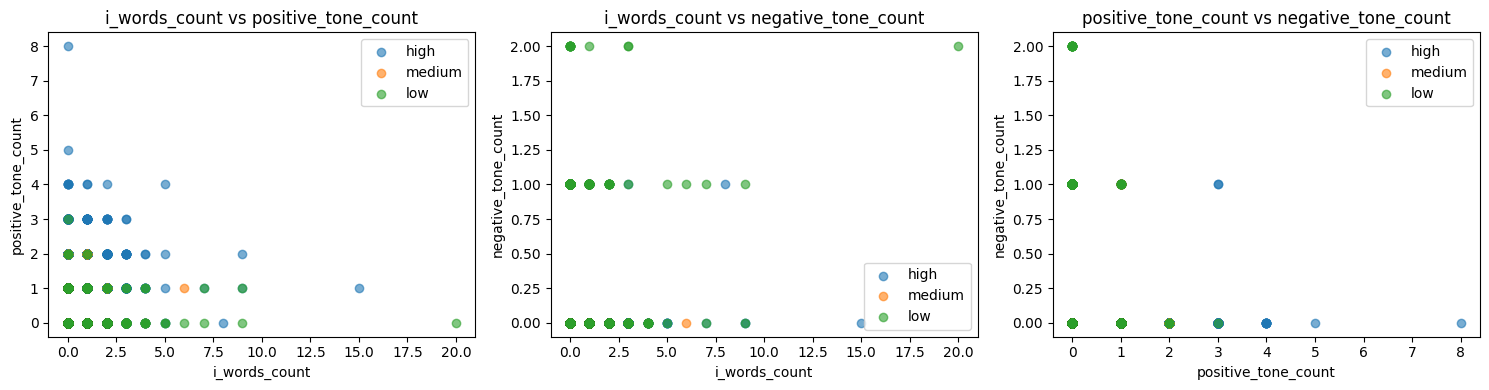

In [11]:
import itertools

sample_features = ['i_words_count', 'positive_tone_count', 'negative_tone_count']
combinations = list(itertools.combinations(sample_features, 2))

classes = df['rating_class'].unique()

fig, axs = plt.subplots(1, len(combinations), figsize=(5 * len(combinations), 4))

for ax, (x, y) in zip(axs, combinations):
    for cls in classes:
        subset = df[df['rating_class'] == cls]
        ax.scatter(subset[x], subset[y], label=cls, alpha=0.6)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
    ax.legend()

plt.tight_layout()
plt.show()

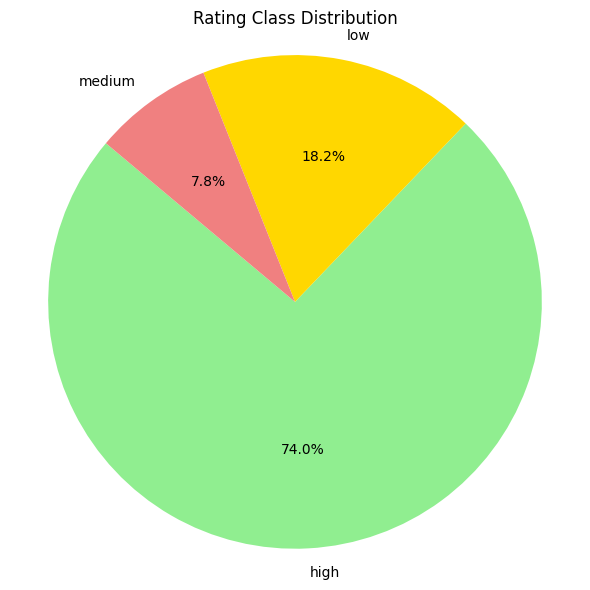

In [12]:
# Get class counts
class_counts = df['rating_class'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'gold', 'lightcoral'])
plt.title('Rating Class Distribution')
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.tight_layout()
plt.show()

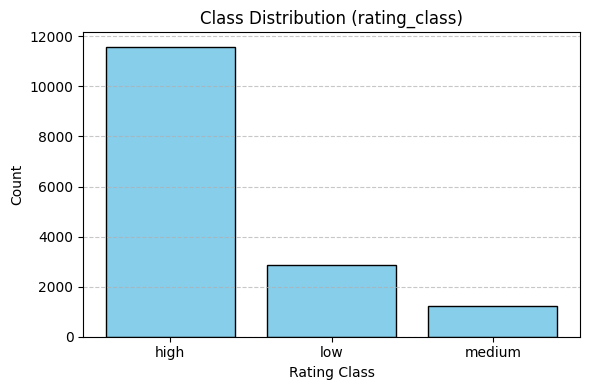

In [13]:
# Step 2: Bar chart to visualize imbalance
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')
plt.title("Class Distribution (rating_class)")
plt.xlabel("Rating Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# DATA CLEANING 

In [14]:
# Drop duplicates
df = df.drop_duplicates()
print(f"Duplicates removed. New shape: {df.shape}")

Duplicates removed. New shape: (15610, 15)


In [15]:
# dropping rows with any missing values
df = df.dropna()
print(f"Dropped rows with missing values. New shape: {df.shape}")

Dropped rows with missing values. New shape: (10896, 15)


In [16]:
df['rating_class'].value_counts()

rating_class
high      8256
low       1790
medium     850
Name: count, dtype: int64

# CORRELATION ANALYSIS

In [17]:
# Define your LIWC features
liwc_features = [
    'i_words_count', 'positive_tone_count', 'negative_tone_count',
    'social_words_count', 'cognitive_proc_count', 'allure_count', 'moralization_count'
]

# Compute the correlation matrix
corr_matrix = df[liwc_features].corr()

# Display the correlation matrix as a dataframe
print("Correlation matrix:")
corr_matrix

Correlation matrix:


,i_words_count,positive_tone_count,negative_tone_count,social_words_count,cognitive_proc_count,allure_count,moralization_count
i_words_count,1.000000,-0.017832,0.067622,0.047269,0.235578,0.058475,0.037177
positive_tone_count,-0.017832,1.000000,-0.065680,-0.008233,-0.036067,-0.060148,-0.019500
negative_tone_count,0.067622,-0.065680,1.000000,0.008581,0.067586,0.009848,0.003664
social_words_count,0.047269,-0.008233,0.008581,1.000000,0.039374,0.001162,0.047522
cognitive_proc_count,0.235578,-0.036067,0.067586,0.039374,1.000000,0.017782,-0.006929
allure_count,0.058475,-0.060148,0.009848,0.001162,0.017782,1.000000,0.005081
moralization_count,0.037177,-0.019500,0.003664,0.047522,-0.006929,0.005081,1.000000


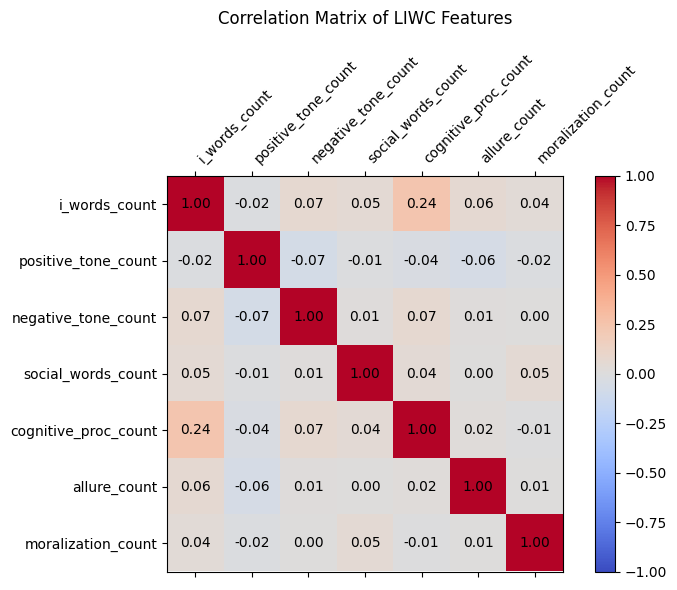

In [18]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(liwc_features)))
ax.set_yticks(np.arange(len(liwc_features)))
ax.set_xticklabels(liwc_features, rotation=45, ha='left')
ax.set_yticklabels(liwc_features)

# Annotate each cell with correlation value
for i in range(len(liwc_features)):
    for j in range(len(liwc_features)):
        ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', va='center', ha='center', color='black')

plt.title('Correlation Matrix of LIWC Features', pad=20)
plt.tight_layout()
plt.show()


# FEATURE AND TARGET SELECTION

In [19]:
# Select LIWC-like features (columns I to O) and the target
features = [
    'i_words_count', 'positive_tone_count', 'negative_tone_count',
    'social_words_count', 'cognitive_proc_count', 'allure_count',
    'moralization_count'
]
target = 'rating_class'

X = df[features].copy()
y = df[target].copy()

# SCALE THE FEATURES

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['rating_class'])


# SPLITTING THE DATA INTO TRAINING AND TEST DATA

In [22]:
# 1. Create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8716, 7)
X_test shape: (2180, 7)
y_train shape: (8716,)
y_test shape: (2180,)


# TRAIN THE MODEL (UNBALANCED)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Define the KNN model (you can tune n_neighbors later)
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. Fit the model on training data
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [25]:
# 3. Predict on test data
y_pred_knn = knn_model.predict(X_test)

# EVALUATE

In [26]:
# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7591743119266054

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      1652
           1       0.51      0.09      0.15       358
           2       0.14      0.01      0.01       170

    accuracy                           0.76      2180
   macro avg       0.47      0.36      0.34      2180
weighted avg       0.68      0.76      0.68      2180

Confusion Matrix:
 [[1622   26    4]
 [ 324   32    2]
 [ 164    5    1]]


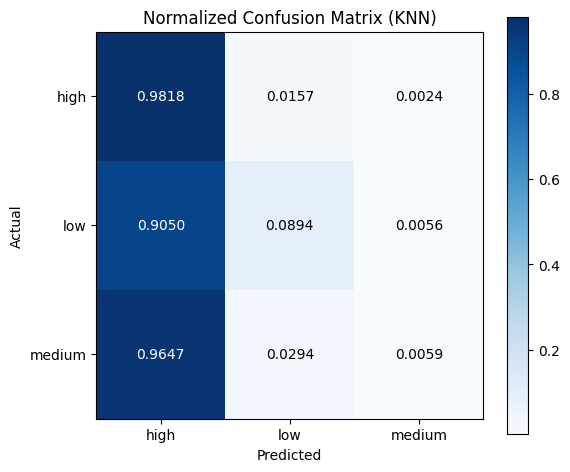

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Compute the confusion matrix (normalized by true class)
cm = confusion_matrix(y_test, y_pred_knn, normalize='true')

# 2. Define class labels if you have a label encoder
class_labels = label_encoder.classes_  # Use your actual encoder

# 3. Plot
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix (KNN)")
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 4. Show values inside cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.4f'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# CROSS VALIDATION

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# 1. Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# 2. Perform cross-validation (use f1_macro for multiclass evaluation)
cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='f1_macro')

In [29]:
print("F1 Macro Scores for each fold:", cv_scores)

F1 Macro Scores for each fold: [0.32810916 0.35632184 0.33413521 0.32258654 0.33671809 0.338734
 0.3449503  0.33770851 0.3297058  0.29776545]


In [30]:
print("Mean F1 Macro Score:", np.mean(cv_scores))

Mean F1 Macro Score: 0.33267348818686104


In [31]:
print("Standard Deviation:", np.std(cv_scores))

Standard Deviation: 0.014630444838151208


# HYPERPARAMETER TUNING

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# 1. Define the model
knn_model = KNeighborsClassifier()

# 2. Define the parameter grid (k values to try)
param_grid = {
    'n_neighbors': list(range(1, 21))  # Try k = 1 to 20
}

# 3. Set up GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Use macro F1 for multiclass balance
    cv=10,
    n_jobs=-1
)

# 4. Run the search
grid_search_knn.fit(X, y)

# 5. Show the best results
print("Best number of neighbors (k):", grid_search_knn.best_params_['n_neighbors'])
print("Best F1 Macro Score:", grid_search_knn.best_score_)

Best number of neighbors (k): 11
Best F1 Macro Score: 0.33680540011885785


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Create the tuned model
knn_best = KNeighborsClassifier(n_neighbors=11)

# 2. Train on training data
knn_best.fit(X_train, y_train)

# 3. Predict on test data
y_pred_knn_best = knn_best.predict(X_test)


In [34]:
# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_best))


Accuracy: 0.7614678899082569

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.99      0.86      1652
           1       0.56      0.06      0.11       358
           2       0.00      0.00      0.00       170

    accuracy                           0.76      2180
   macro avg       0.44      0.35      0.32      2180
weighted avg       0.67      0.76      0.67      2180

Confusion Matrix:
 [[1638   14    0]
 [ 336   22    0]
 [ 167    3    0]]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

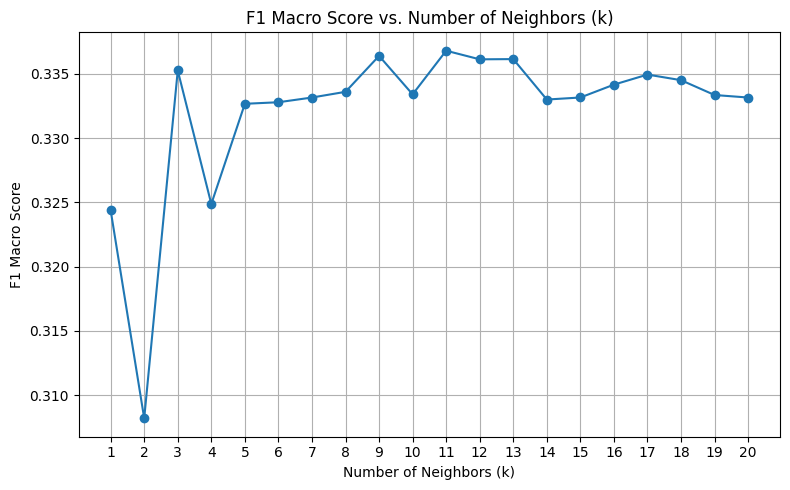

In [35]:
import matplotlib.pyplot as plt

# Get all tested k values and their corresponding mean test scores
k_values = grid_search_knn.cv_results_['param_n_neighbors'].data.astype(int)
f1_scores = grid_search_knn.cv_results_['mean_test_score']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, f1_scores, marker='o')
plt.title('F1 Macro Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Macro Score')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# BALANCING THE MODEL

In [36]:
# 1. Balance the data
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)

# Optional: View new class distribution
print("Balanced Class Distribution:")
print(Counter(y_bal))

Balanced Class Distribution:
Counter({np.int64(0): 8256, np.int64(2): 8256, np.int64(1): 8256})


In [37]:
# 2. Split the balanced data into training/testing sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

In [38]:
# 3. Train the KNN model (you can choose your k, here we'll use 5)
knn_bal = KNeighborsClassifier(n_neighbors=5)
knn_bal.fit(X_train_bal, y_train_bal)

# 4. Evaluate the model
y_pred_bal = knn_bal.predict(X_test_ba
l)

print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_bal))


SyntaxError: invalid syntax. Perhaps you forgot a comma? (541228204.py, line 6)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test_bal, y_pred_bal))

# MODEL AFTER BALACNING (CROSS VALIDATION & HYPERPARAMETER TUNING)

In [ ]:
# Set up GridSearchCV for KNN
param_grid = {'n_neighbors': list(range(1, 21))}

knn_model = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Use macro F1 for balanced evaluation
    cv=10,
    n_jobs=-1
)

# Fit grid search on training data (or X_bal, y_bal for full CV)
grid_search.fit(X_train_bal, y_train_bal)


In [ ]:
# Best parameters and score
print("Best number of neighbors (k):", grid_search.best_params_['n_neighbors'])
print("Best Cross-Validated F1 Macro Score:", grid_search.best_score_)

In [ ]:
# Evaluate the best model on test set
best_knn = grid_search.best_estimator_
y_pred_bal = best_knn.predict(X_test_bal)

print("\nClassification Report (Test Set):")
print(classification_report(y_test_bal, y_pred_bal))

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Use the same model you trained
knn_model = KNeighborsClassifier(n_neighbors=5)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    knn_model, X_bal, y_bal,
    cv=5,
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training F1', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Validation F1', marker='s')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.title("Learning Curve (KNN Model)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Macro Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
